In [9]:
import os
import glob
from functools import reduce

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Analysis
---

Description: This is a test for fan-out evaluation. A publisher publishes messages to a varying number of subscribers. The VM hosting the publisher is pinned to a sinlge core (core 9), and the publisher process -- along with all its threads -- is pinned to a single core (core 3). The interval is set to 1ms.

In [11]:
results_dir = "../../../results/sub/vms/fanin/"
date_time_list = ["20170730163819.235378", "20170730173148.946492"]

cols = ['%cpu', '%mem'] 

In [12]:
dish_data_dict = {}

for date_time in date_time_list:
    for i in glob.glob(results_dir + date_time + "/dish_stats_with__*"):
        count = eval(i.split('__')[1].split('_')[1].replace('x','*'))
        dish_data_dict[count] = pd.read_csv(i, sep=' ', header=None, na_filter=False, names = cols)

sorted(dish_data_dict.keys())

[2, 4, 8, 16, 32, 64, 100, 120, 128, 150]

In [13]:
kvm_data_dict = {}

for date_time in date_time_list:
    for i in glob.glob(results_dir + date_time + "/kvm_stats_with__*"):
        count = eval(i.split('__')[1].split('_')[1].replace('x','*'))
        kvm_data_dict[count] = pd.read_csv(i, sep=' ', header=None, na_filter=False, names = cols)

sorted(kvm_data_dict.keys())

[2, 4, 8, 16, 32, 64, 100, 120, 128, 150]

In [14]:
usage = pd.DataFrame()

usage['subs'] = sorted(dish_data_dict.keys())
usage['%vcpu'] = [dish_data_dict[i]['%cpu'].mean() for i in usage['subs']]
usage['%vmem'] = [dish_data_dict[i]['%mem'].mean() for i in usage['subs']]
usage['%pcpu'] = [kvm_data_dict[i]['%cpu'].mean() for i in usage['subs']]
usage['%pmem'] = [kvm_data_dict[i]['%mem'].mean() for i in usage['subs']]

usage = usage.set_index('subs')

usage

,%vcpu,%vmem,%pcpu,%pmem
subs,,,,
2,4.930769,0.015385,11.815385,5.6
4,9.950000,0.028571,19.085714,5.6
8,14.207143,0.057143,24.878571,5.6
16,23.536364,0.090909,38.572727,5.6
32,37.280000,0.100000,53.721429,5.6
64,57.950000,0.100000,74.979167,5.6
100,72.591667,0.100000,88.800000,5.6
120,80.853846,0.100000,93.719231,5.6
128,82.640000,0.100000,94.860000,5.6


Note: after 150 subscribers, I start to see the following error (at this time pcpu hits 100% and more):

`Resource temporarily unavailable (src/udp_engine.cpp:372)
Aborted (core dumped)`

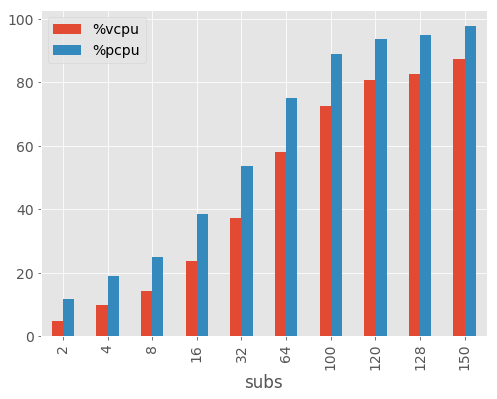

In [15]:
usage[['%vcpu', '%pcpu']].plot(kind='bar')

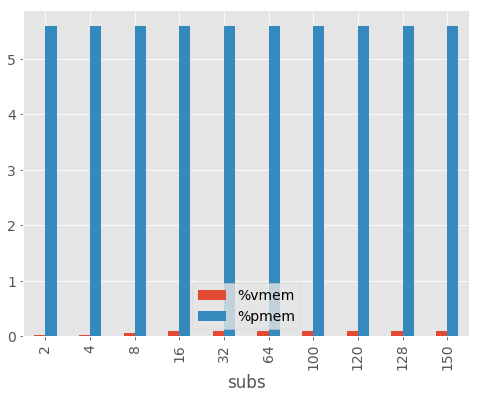

In [16]:
usage[['%vmem', '%pmem']].plot(kind='bar')